PROC FREQ
=============
--: shortcut for all intermediate variable
TABLES GENDER -- CITIES

In [1]:
DATA MAZETIME;
INPUT SUBJECT$ 1-4 SEX$ 5 AGE 6-9 TIME 10-11;
IF AGE LT 70 THEN SEGMENT='YOUNG';
ELSE SEGMENT='OLD';
DATALINES;
B324M12.571
A712M13.773
H308M13.168
C119F75.375
;
/*PROC SORT;
BY SEX;*/
PROC PRINT DATA=MAZETIME;
Title "Maze Time";
ID Subject;
RUN;

SUBJECT,SEX,AGE,TIME,SEGMENT
B324,M,12.5,71,YOUNG
A712,M,13.7,73,YOUNG
H308,M,13.1,68,YOUNG
C119,F,75.3,75,OLD


In [3]:
PROC FREQ;
TABLES SEX -- TIME;
RUN;

SEX,Frequency,Percent,CumulativeFrequency,CumulativePercent
F,1,25.00,1,25.00
M,3,75.00,4,100.00
AGE,Frequency,Percent,CumulativeFrequency,CumulativePercent
12.5,1,25.00,1,25.00
13.1,1,25.00,2,50.00
13.7,1,25.00,3,75.00
75.3,1,25.00,4,100.00
TIME,Frequency,Percent,CumulativeFrequency,CumulativePercent
68,1,25.00,1,25.00
71,1,25.00,2,50.00


PROC FORMAT
=============
Easier to understand, decouple format with data
```
PROC FORMAT;
    VALUE $RACE '1' = 'White' '2'='African' '3'='Other';
    VALUE LIKER 1='Str Disagree' 5='Str Agree';
RUN;    

DATA _NULL_;

INPUT RACE $ 7 ... AGE 11-12 ... CITIES 18;

IF 0<=AGE<=20 THEN AGEGRP=1;             *SAS treat missing values as negative infinty for ordering purpose;
IF AGE <= 20 AND AGE NE . THEN AGEGRP=1; *equal to above;
ELSE IF 20 < AGE <= 40 THEN AGEGRP=2;         *RECODING DATA;

FORMAT RACE $RACE. VAR1 VAR2 CITIES LIKER.;
```

In [4]:
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 3
 * Probleml:  1a
 * Date: September 25th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 * 
 * 
 */
Proc Format;
Value GENDERFT          1 = "MALE"
                        2 = "FEMALE"
                        Other  = "MISCODED";

Value  $SESFT			"L"="LOW"
						"M"="MEDIUM"
						"H"="HIGH";     
   
Value AGEFT  			LOW-20 	= "20 YEARS OLD AND YOUNGER"
		                21-40 	= "BETWEEN 21 AND 40 YEARS OLD"
                        41-HIGH = "41 YEARS OLD AND OLDER";

Run;

Data HEALTHCARE_DRUGS;
LENGTH COST$ 12;
INPUT ID$ GENDER SES$ DRUG$ AGE;

FORMAT 	GENDER 	GENDERFT.
		SES$ 	SESFT.;
LABEL 	SES ="SOCIALECONOMICS" DRUG="DRUG GROUP" AGE = "AGE OF THE SUBJECT";

IF UPCASE(DRUG)= "A" OR UPCASE(DRUG)= "B" OR UPCASE(DRUG)= "C" OR UPCASE(DRUG)= "F" THEN COST="GENERIC";
IF UPCASE(DRUG)= "D" OR UPCASE(DRUG)= "E" OR UPCASE(DRUG)= "G" OR UPCASE(DRUG)= "H" THEN COST="PREMIUN";
IF COST="" THEN COST="MISCODED";

DATALINES;
001 1   L B 15
002 2 M    Z   35
003    2 H  F 76
004 1 L c 21
005 2 H . 58
006 2 L    G 47
007  2 L  D    23
008 1  M E  51
009 1 H    A  32
010   1  H   g  19
;

PROC PRINT DATA= HEALTHCARE_DRUGS NOOBS;
RUN;
PROC SORT DATA=HEALTHCARE_DRUGS;
BY AGE;
PROC FREQ DATA = HEALTHCARE_DRUGS;
TABLES (SES COST )*AGE AGE;
FORMAT AGE AGEFT.;
Run;


COST,ID,GENDER,SES,DRUG,AGE
GENERIC,001,MALE,LOW,B,15
MISCODED,002,FEMALE,MEDIUM,Z,35
GENERIC,003,FEMALE,HIGH,F,76
GENERIC,004,MALE,LOW,c,21
MISCODED,005,FEMALE,HIGH,,58
PREMIUN,006,FEMALE,LOW,G,47
PREMIUN,007,FEMALE,LOW,D,23
PREMIUN,008,MALE,MEDIUM,E,51
GENERIC,009,MALE,HIGH,A,32
PREMIUN,010,MALE,HIGH,g,19


In [6]:

/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 3
 * Probleml:  2a
 * Date: September 25th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 * Open and external file URBANDEVELOPMENT.XLSX
 * 
 */
 
PROC FORMAT;
			/*Sell Item*/ 
Value AFT 		0="No"
				1="Yes";
Value BFT 	 	0="No"
				1="Yes";
Value CFT 	 	0="No"
				1="Yes";
Value DFT 		0="No"
				1="Yes";
Value EFT 		0="No"
				1="Yes";
Value FFT 		0="No"
				1="Yes";

Value GFT	  	/*restaurant services*/
				0= "No restaurant" 
				1 = "Carry out" 
				2 = "Dine In";

Value SICFT 	/*tax code type of store*/
				52 = "Hardware"
				53 = "General Merchandise"
				54 = "Grocery"
				56 = "Apparel"
				57 = "Furniture"
				59 = "Electronics";

RUN;

DATA URBAND;

PROC IMPORT OUT=URBAND DATAFILE= "/folders/myfolders/SAS-Programming/HW_3/UrbanDevelopment.xls" 
	DBMS=XLS replace;
	SHEET="Sheet1";
    GETNAMES=yes;
FORMAT A AFT. B BFT. C CFT. D DFT. E EFT. F FFT. G GFT. SIC SICFT.;
PROC PRINT DATA=URBAND(obs=3);
RUN;



Obs,ID,YIB,SqF,Sales,A,B,C,D,E,F,G,SIC
1,A101,12,59800,28000000,Yes,Yes,Yes,Yes,Yes,Yes,Dine In,General Merchandise
2,A102,6,26,8400,No,Yes,Yes,No,No,No,Carry out,Grocery
3,A105,9,35,11300,Yes,No,No,No,Yes,No,Carry out,Electronics


CHISQ INDEPENDENT TEST
=======================
TABLES GENDER*SLEEP*RESULTS / ALL: chi-square to stratified tables
TABLES SIC*ZIPCODE/AGREE: McNemar's chi-square (paired vesion of chi square test)    
TABLES SIC*ZIPCODE/CHISQ: 
- check RowPCT if indepeendent, all col for the same row, should about equal
- check of significant difference for chi square  
- Mantel-Haenszel Chi-Square test for significant trend for 2XN table represent ordinal levels

ORDER=FORMATTED: order according to proc format  
EXPECTED: expected count  
WEIGHT csVar: use when you already has the count table result prior the proc freq, use csVar for chi-square calculation  
CMH: 

- (Odd Ratio): odd ratio and 95% CI on odds ratio
- (Col1 Risk): relative risk ie) placebo risk/aspirin risk

In [8]:
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 3
 * Probleml:  2b
 * Date: September 25th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 * 
 * 
 */

DATA URBAN_DEVELOP;
SET WORK.URBAND;
SALES_X_SQF = (SALES)/(SQF);
/* 	LABELS type of items they sell*/
LABEL 		A="Hardware" B="Grocery" C="General Merchandise" D="Furniture"
			E="Electronics"
			F="Video and Music"
			G="Restaurant Services"
			YIB="Years in Business"
			SQF="Square Footage"
			SIC="Standard Industrial Classification";

IF CHAR(ID,1) = "A" THEN ZIPCODE = 60612; 
ELSE IF CHAR(ID,1) = "B" THEN ZIPCODE = 60622;
ELSE IF CHAR(ID,1) = "C" THEN ZIPCODE = 60624;
ELSE IF CHAR(ID,1) = "D" THEN ZIPCODE = 60634;
ELSE IF CHAR(ID,1) = "E" THEN ZIPCODE = 60639;

PROC SORT DATA=URBAN_DEVELOP;
BY ZIPCODE;
PROC FREQ DATA= URBAN_DEVELOP;
TABLES ZIPCODE*(SIC A -- C);
TABLES SIC*ZIPCODE/CHISQ;*Chi-square test on type of store (SIC)per zip codes;
PROC MEANS DATA= URBAN_DEVELOP MEAN STD MEDIAN QRANGE;
BY ZIPCODE;
VAR YIB SALES SALES_X_SQF;
RUN;

/*
Do any of the zip codes appear to be food deserts and why?
From the tables  we can see that zipcode 60612 may be a food desert , if we compare 
the frequency in table B and SIC for this zipcode we can see what may be a significance
difference compare with other zipcodes.
  
(i) Compare the years in business variable between the zip codes. 
Does there seem to be an a zip code that is more or less stable.
Looking at the standard deviation of the mean table we can see 
that zipcode 60634 as an smaller standard deviation meaning that businesses in that
zipcode dont change that frequently. 

(ii) Compare the mean sales. Does one zip code look like it generates 
more or less sales than other zip codes. 
Looking at the sales per square feet and overall sales we can see that zipcode
60634 generates more revenues than the others. 
Do these trends (if any exist) persist with sales per square feet.
The same conditions persist for sales per square feet with the only variation that for
zipcode 60622 the spread is larger(IQR) meaning that there is a greater variation 
in the sales per square feet for zipcode 60622.

(i) State the Null and Alternative Hypothesis determine whether there is a 
significant relationship between store (SIC) and zip codes.
*****Null Hypothesis (Ho)*****
There is no difference, association or dependency 
between the type of store (SIC) and the zipcode.
*****Alternative Hypothesis (H1)****
There is a coorelation between the type of store and the zipcode.	 	

(ii) State the test statistic, the p-value and your conclusion.
To answer our hypothesis we can look at the Chi-Square, to find that the 
chi-square test statistic value is 14.3027 and the associated p-value is 0.8148. 
As  chi-squared is larger than the 0.05 (critical point) we have to reject the null 
hypothesis and conclude that there is a correlation between the zipcode and SIC.
 
(iii) Why might the Chi-Square test of independence not be the best hypothesis test?
SAS give us a WARNING: 70% of the cells have expected counts less than 5. Chi-Square may not be a valid test.
In this cases it is better to use the Fisher’s Exact Test taking in count that we need a 2X2 table
where that makes and association between the row and column variables. This test assumes that 
the row and column totals are fixed, and then uses the hypergeometric distribution to compute 
probabilities of possible tables conditional on the observed row and column totals. Fisher’s exact 
test does not depend on any large-sample distribution assumptions, and so it is appropriate 
even for small sample sizes and for sparse tables. 
*/
 


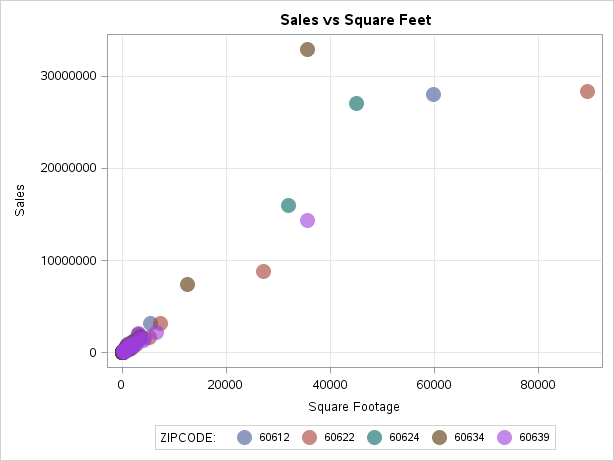

In [9]:
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 3
 * Probleml:  2c
 * Date: September 25th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 * 
 * 
 */
/*--Set output size--*/
ods graphics / reset width=6.4in height=4.8in imagemap;

/*--SGPLOT proc statement--*/
proc sgplot data=WORK.URBAN_DEVELOP noautolegend;
    /*--TITLE and FOOTNOTE--*/
    title "Sales vs Square Feet";

    /*--Scatter plot settings--*/
    scatter x=SqF y=Sales / group=ZIPCODE markerattrs=(symbol=CircleFilled 
        size=15) transparency=0.4 name='Scatter';
    ;

    /*--X Axis--*/
    xaxis grid;

    /*--Y Axis--*/
    yaxis grid;

    /*--Legend Settings--*/
    keylegend 'Scatter' / title='ZIPCODE:' location=Outside;
run;

/*

Does there appear to be a trend in this? 
It seems like as the square footage increse sales increase, in the five different 
zipcodes. 
*/

In [11]:
DATA CRIME;

INPUT CRIME$ ALCOHOL$  COUNT;

DATALINES;
ARSON YES 50
ARSON NO 43
RAPE YES 88
RAPE NO 62
VIOLENCE YES 155
VIOLENCE NO 110
STEALING YES 379
STEALING NO 300
COINING YES 18
COINING NO 14
FRAUD YES 63
FRAUD NO 144
;

PROC FREQ DATA=CRIME ORDER=DATA;
TABLES CRIME*ALCOHOL /CHISQ DEVIATION EXPECTED CMH;
WEIGHT COUNT;
RUN;

/*
b. State the Null and Alternative Hypothesis for the Chi-Square test

*****Null Hypothesis (Ho)*****
There is no difference, association or dependency 
between types of crimes and consumption of alcohol.

*****Alternative Hypothesis (H1)*****
There is a coorelation between the consume of alcohol and the type of crime.

c. State the conclusion a 95% confidence level. Include the test statistic 
and p-value in your conclusion.
The chi-square test statistic value is 49.7306 	p-value is less than 0.0001 meaning
that with a 95% confidence we can say that there is not a correlation between the
consumption of alcohol and the type of crime commited that can be determine from this
sample.

d. Based on this data, does it appear that drinkers are more likely to commit crimes? 
Justify your answer. Look for anything unusual in the output.
From this data we cant infer that drinkers are more likely to commit crimes and we
can see an outlier in the fraud crimes where 10.10% were committed by a non-drinker
and just 4.42% by a drinker at of 14.52%  

*/

In [1]:
/*
 * ----ASSIGMENT_4---------
 * Author: Jose L Rodriguez
 * Assigment: 4
 * Problem:  1
 * Date: October 2nd, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 */
DATA ASTHMA;
INPUT SOC_STATUS$ ASTHMA_IND$ COUNT;
DOUBLECOUNT=COUNT*2;
DATALINES;
LOW YES 40
HIGH YES 30
LOW NO 100
HIGH NO 130
;
PROC FREQ DATA=ASTHMA ORDER=DATA;
TABLES SOC_STATUS*ASTHMA_IND /CHISQ CMH;
WEIGHT COUNT;
RUN;
PROC FREQ DATA=ASTHMA;
TABLES SOC_STATUS*ASTHMA_IND /CHISQ;
WEIGHT DOUBLECOUNT;
RUN;
/**

a.	State the Null and Alternative Hypothesis for the Chi-Square test

Ho: There is no relationship between socio economic status and asthma
giving that the subject belongs to one of the three socio economic status.

Ha: There is a relationship between the socio economic status and asthma when 
giving that the subject belongs to one of the three socio economic status.

b.	State the conclusion
Non-significant Cochran-Mantel Haenzel test tells us that after there’s no 
evidence of an association between socio economic status and asthma. 

c.	Interpret the relative risk ratio, What is the 95% CI and interpret this.
CRUDE RATIO 
Socio Economics vs. Asthma: 1.7333

CRUDE RR 
Asthma vs. Socio Economics = 1.5238 (1.0057,2.3088)

Conclusion: People from low socio economic status are 52% more likely to 
have asthma, and we can say that we are 95% certain that the true population odd ratio
is in the interval somewhere between 1.0057 and 2.3088.

g.	Compare the chi-square value and p-value to part B.  
	Why is it important to do a Chi-square test on the actual frequencies 
	rather than rates or percents?
	
Chi-square must be calculated on actual count data, not substituting 
percentages, which would have the effect of pretending the sample size. As Chi-square 
test is only meant to test the probability of independence of a distribution of data.
In this case the hypothesis observed chi-squareis are not significantly different 
from expected, something that isnt true because we double counted the data.

***PART_A***
Chi-Square 	1 	4.0262 	0.0448
***PART_B***
Chi-Square 	1 	8.0524 	0.0045

**/


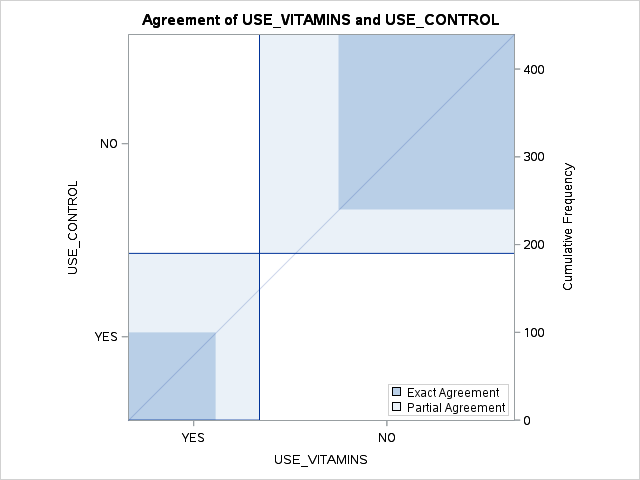

In [2]:
/*
 * ----ASSIGMENT_4---------
 * Author: Jose L Rodriguez
 * Assigment: 4
 * Problem:  2
 * Date: October 2nd, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 */

DATA VITAMINS;
INPUT USE_VITAMINS$ USE_CONTROL$ VITAMINS_COUNT;

DATALINES;
YES YES 100
YES NO 50
NO YES 90
NO NO 200
;

PROC FREQ DATA=VITAMINS ORDER=DATA;
TABLES USE_VITAMINS*USE_CONTROL /AGREE;
WEIGHT VITAMINS_COUNT;
RUN;

/*
A matched-pairs case-control study is conducted. Each case (a person with disease X) 
is matched to a single control, based on age (plus or minus 2 years) and gender. 
Each person is then asked if he/she used multivitamins regularly in the past year.

a.	State the Null and Directional Alternative Hypothesis for  McNemar’s test.

Ho : The consuption of multivitamins regularly helped fight the disease.
Ha : The consuption of multivitamins regularly doesnt have any effect on the treatment.

b.	Answer the question “Are the cases more or less likely to have used vitamins?” 
	Justify this with your p-value.
From the table we have that McNemar's chi-squate statistics is 11.4286, with a
corresponding p-value of 0.0007. We can conclude that the consuption of vitamins doesnt
have any effect on the treatment of the disease.

*/


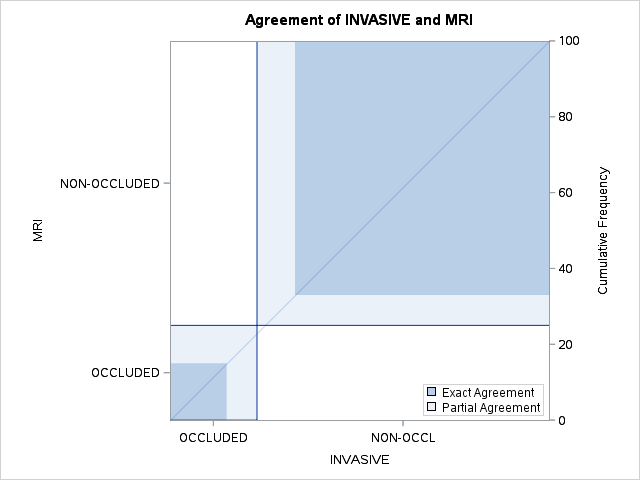

In [3]:
/*
 * ----ASSIGMENT_4---------
 * Author: Jose L Rodriguez
 * Assigment: 4
 * Probleml:  3
 * Date: October 2nd, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 */

DATA MEDICAL;
LENGTH MRI$ 12;
INPUT INVASIVE$ MRI$ COUNT;
DATALINES;
OCCLUDED OCCLUDED 15
OCCLUDED NON-OCCLUDED 8
NON-OCCLUDED OCCLUDED 10
NON-OCCLUDED NON-OCCLUDED 67
;
PROC FREQ DATA=MEDICAL ORDER=DATA;
TABLES INVASIVE*MRI/AGREE;
WEIGHT COUNT;
RUN;

/*

b. What is the strength of the inter-reliability of the two methods.
We use Kappa as a measure of agreement between two raters. The kappa statistics removes
the effect of the random agreement and provides a commonly used statistics of agreement.
From the output we can see that the kappa is 0.5068, indicating a medium/moderate 
agreement. The strength of the inter-realiability of these two methods relies in how
they correlate in some cases making an stronger hypothesis or disprove further our
hyphothesis.
*/

GOODNESS - OF - FIT TEST
=================================
TESTP: specify the null hypothesis (expected) proportions or frequencies for a chi-square goodness-of-fit test on a one-way table.


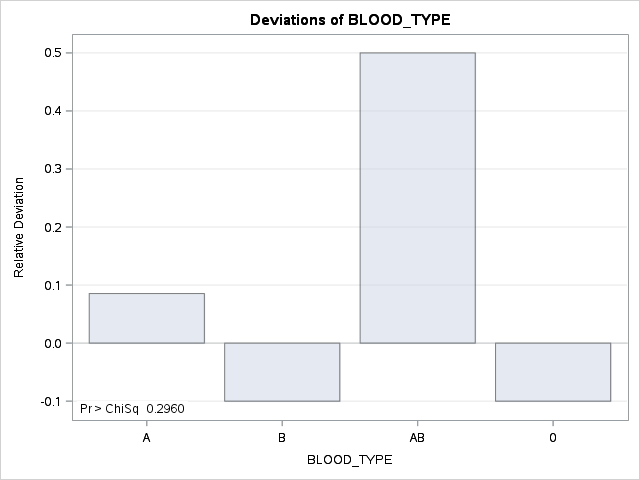

In [4]:
/*
 * ----ASSIGMENT_5---------
 * Author: Jose L Rodriguez
 * Assigment: 5
 * Problem: 1
 * Date: October 17th, 2014
 * SAS303 - FALL 2014
 * SAS 9.4 TS Level 1M1 
 * W32_7PRO platform
 */
DATA RANDOM_SAMPLE;
INPUT BLOOD_TYPE$ OBSERVED;
DATALINES;
A 89
B 18
AB 12
0 81
;
PROC FREQ DATA=RANDOM_SAMPLE ORDER=DATA;
TABLES BLOOD_TYPE/ CHISQ TESTP=(41 10 4 45);
WEIGHT OBSERVED;
TITLE "Blood Phenotype Random Sample ";
RUN;
